# In diesem Notebook führe ich A/B-Tests mit einem Datensatz durch, der die Verkaufszahlen eines Laptop-Geschäfts enthält.

# In this notebook, i am making a/b testing on a dataset that include the sales of a laptops store

In [108]:
# import needed libraries  to deal with tables and visualization
# Importieren der benötigten Bibliotheken für Tabellen und Visualisierung
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# loading the dataset
# Laden des Datensatzes
df = pd.read_excel("Laptop Sales Per Day.xlsx")
df.shape

(1303, 13)

In [110]:
# take a short look
# einen kurzen Blick werfen
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight,Price_euros,Total Sales per Day (euros)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2679.38
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1150.00
3,Apple,,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,7612.35
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3607.20


In [111]:
# making a new column that divides total sales by unit price to discover number of units sold
# eine neue Spalte erstellen, die den Gesamtumsatz durch den Stückpreis teilt, um die Anzahl der verkauften Einheiten zu ermitteln.
df['units sold in a day'] = df['Total Sales per Day (euros)'] / df['Price_euros']
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight,Price_euros,Total Sales per Day (euros),units sold in a day
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2679.38,2.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,898.94,1.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1150.00,2.0
3,Apple,,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,7612.35,3.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3607.20,2.0


In [112]:
# preprocessing, removing null values
# Vorverarbeitung, Entfernen von Nullwerten
df = df.dropna()
df.shape

(1303, 14)

In [113]:
# finding how many unique values in categorical column and identifying  the categories
# so later i can do a/b testing for some specific tasks
# Anzahl der eindeutigen Werte in einer kategorialen Spalte ermitteln und Kategorien identifizieren
# um später A/B-Tests für bestimmte Aufgaben durchführen zu können
CompanyU = df['Company'].nunique()
ProductU = df['Product'].nunique()
TypeNameU = df['TypeName'].nunique()
ScreenResolutionU = df['ScreenResolution'].nunique()
CpuU = df['Cpu'].nunique()
RamU = df['Ram (GB)'].nunique()
GpuU = df['Gpu'].nunique()
OpSysU = df['OpSys'].nunique()
print(CompanyU, ProductU,TypeNameU)
print(ScreenResolutionU, CpuU, RamU)
print(GpuU, OpSysU)

19 618 6
40 118 9
110 9


In [114]:
CompanyNU = df['Company'].unique()
TypeNameNU = df['TypeName'].unique()
print(CompanyNU)
print(TypeNameNU)

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [115]:
ScreenResolutionNU = df['ScreenResolution'].unique()
RamNU = df['Ram (GB)'].unique()
print(ScreenResolutionNU)
print(RamNU)

['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscreen 1366x768' '1920x1080'
 'IPS Panel Full HD 1920x1200'
 'IP

In [116]:
OpSysNU = df['OpSys'].unique()
print(OpSysNU)

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


# General statistics

In [117]:
# getting statistics of integer type columns
# Statistiken von Spalten vom Typ Integer abrufen
df.describe()

,Inches,Ram (GB),Weight,Price_euros,Total Sales per Day (euros),units sold in a day
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,2432.426048,2.173446
std,1.426304,5.084665,0.665475,699.009043,1957.498774,0.877611
min,10.100000,2.000000,0.690000,174.000000,224.000000,1.000000
25%,14.000000,4.000000,1.500000,599.000000,1138.000000,2.000000
50%,15.600000,8.000000,2.040000,977.000000,1900.000000,2.000000
75%,15.600000,8.000000,2.300000,1487.880000,3158.000000,3.000000
max,18.400000,64.000000,4.700000,6099.000000,19875.000000,5.000000


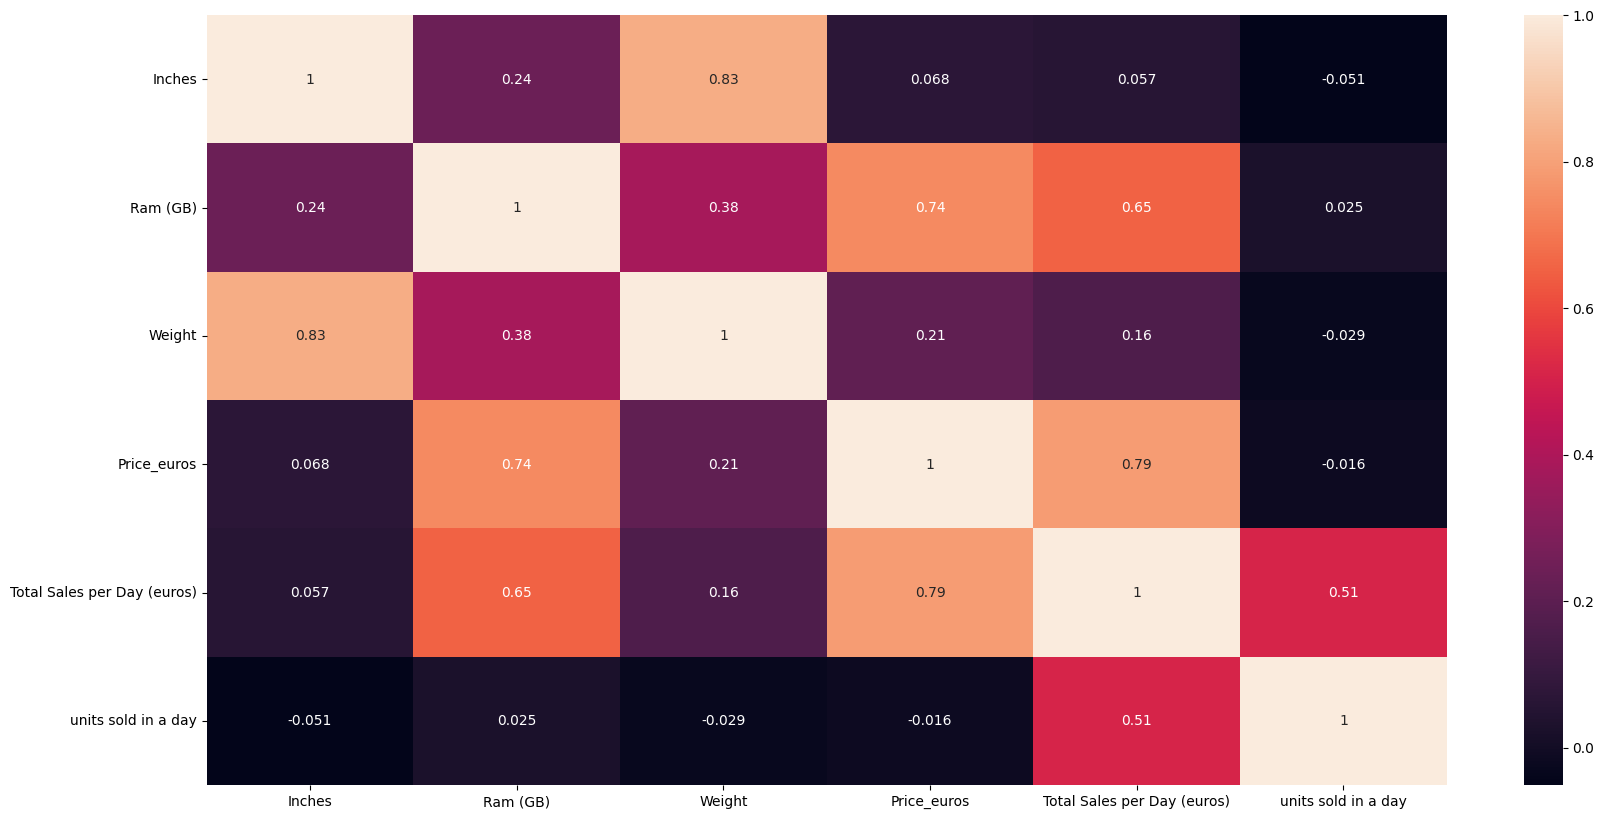

In [118]:
# seeing the correlation matrix of the numerical type columns
# Anzeige der Korrelationsmatrix der Spalten vom numerischen Typ
plt.figure(figsize=(20,10))
corrmatrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

# we see strong correlation between RAM size, price, total sales and units sold per day
# Wir sehen eine starke Korrelation zwischen RAM-Größe, Preis, Gesamtumsatz und verkauften Einheiten pro Tag

See if lower prices have significant impact on sales.

Prüfen, ob niedrigere Preise einen signifikanten Einfluss auf den Umsatz haben

In [119]:
# correlation method
# Korrelationsmethode
from scipy.stats import pearsonr
corr, p = pearsonr(df['Price_euros'], df['units sold in a day'])
print("Correlation unit price to salescounts:", corr)
print("p vlaue:", p)

# using pearson correlation, we see that correlation between price and unit sold is around 0.5 which is not big
# p value is bigger than 0.05 so it there is no big relation between the price and units sold

Correlation unit price to salescounts: -0.016063684348467614
p vlaue: 0.5623644039956455


In [120]:
# regression method
# Regressionsmethode
import statsmodels.api as sm
x = sm.add_constant(df['Price_euros'])
y = df['Total Sales per Day (euros)']
model = sm.OLS(y, x).fit()
print(model.summary())

# p value between the prices and total sale is bigger than 0.05 which shows that there is no strong relation between them
# Der p-Wert zwischen den Preisen und dem Gesamtumsatz ist größer als 0,05, was darauf hindeutet, dass kein starker Zusammenhang zwischen ihnen besteht.

                                 OLS Regression Results                                
Dep. Variable:     Total Sales per Day (euros)   R-squared:                       0.624
Model:                                     OLS   Adj. R-squared:                  0.623
Method:                          Least Squares   F-statistic:                     2157.
Date:                         Mon, 17 Nov 2025   Prob (F-statistic):          1.98e-278
Time:                                 14:42:00   Log-Likelihood:                -11088.
No. Observations:                         1303   AIC:                         2.218e+04
Df Residuals:                             1301   BIC:                         2.219e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Check if change in the demand for a product change with the price

Prüfen, ob sich die Nachfrage nach einem Produkt mit dem Preis ändert

In [121]:
# regression method
# Regressionsmethode
x = sm.add_constant(df['Price_euros'])
y = df['units sold in a day']
model = sm.OLS(y, x).fit()
print(model.summary())

# looking at r squared, coefficient and p value, we don't see any significant relation
# Betrachtet man das Bestimmtheitsmaß (R²), den Koeffizienten und den p-Wert, so lässt sich kein signifikanter Zusammenhang feststellen.

                             OLS Regression Results                            
Dep. Variable:     units sold in a day   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.3358
Date:                 Mon, 17 Nov 2025   Prob (F-statistic):              0.562
Time:                         14:42:00   Log-Likelihood:                -1678.1
No. Observations:                 1303   AIC:                             3360.
Df Residuals:                     1301   BIC:                             3371.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1961      0.046     47

In [122]:
# elasticity method
# Elastizitätsmethode
import numpy as np
df['logprice'] = np.log(df['Price_euros'])
df['logcount'] = np.log(df['units sold in a day'])
model5 = sm.OLS(df['logcount'], sm.add_constant(df['logprice'])).fit()
model5.summary()

# looking at the results, confidence inerval, p value, r squared, we dont any string relations between price and units sold
# Betrachtet man die ergebnisee, den p-Wert und das Bestimmtheitsmaß (R²), so lassen sich keine eindeutigen Zusammenhänge zwischen Preis und verkauften Einheiten feststellen.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logcount   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.761
Date:                Mon, 17 Nov 2025   Prob (F-statistic):             0.0968
Time:                        14:42:00   Log-Likelihood:                -710.78
No. Observations:                1303   AIC:                             1426.
Df Residuals:                    1301   BIC:                             1436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9038      0.127      7.090      0.000       0.654       1.154
logprice      -0.0308      0.019     -1.662      0.097      -0.067       0.006
==============================================================================
Omnibus:                       33.104   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.671
Skew:                          -0.285   Prob(JB):                     9.80e-07
Kurtosis:                       2.570   Cond. No.                         77.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# A/B testing

**Null hypothesis:** no difference in total sales between different groups of CPUs, Device types and RAMs.

**Alternative hypothesis:** there is a difference in total sales between different groups of CPUs, Device types and RAMs

1) performing t-test on the total sales of Xiaomi and Huawei

Durchführung eines t-Tests für die Gesamtumsätze von Xiaomi und Huawei

In [123]:
# extract t-stat and p_value to see if there a relation between the company and the sales
# Ermittlung der t-Statistik und des p-Werts, um festzustellen, ob ein Zusammenhang zwischen dem Unternehmen und den Umsätzen besteht.

from scipy.stats import ttest_ind
Xiamoisales = df[df['Company']=='Xiaomi']['Total Sales per Day (euros)']
Huaweisales = df[df['Company']=='Huawei']['Total Sales per Day (euros)']
t_stat, p_val = ttest_ind(Xiamoisales, Huaweisales, equal_var=False)
print(p_val, t_stat)

# t test was used
# p value (0.73) between company and total sales is big so we cant say
# t stat show no big difference between total sales of the 2 company groups
# Es wurde ein t-Test durchgeführt.
# Der p-Wert (0,73) zwischen den Unternehmen und den Gesamtumsätzen ist hoch, daher lässt sich keine Aussage treffen.
# Die t-Statistik zeigt keinen signifikanten Unterschied zwischen den Gesamtumsätzen der beiden Unternehmensgruppen.

0.729928365919242 0.4463183629616571


2) perfmornig t-test to test any differnce between sales of 2 brands of CPU

Durchführung eines t-Tests, um Unterschiede in den Verkaufszahlen zweier CPU-Marken zu prüfen

In [124]:
# first, see what types there is
# Zuerst wird geprüft, welche Typen es gibt
CpuU = df['Cpu'].unique()
CpuU

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [125]:
# turn them to the three main brands mentioned
# Wenden Sie sie auf die drei genannten Hauptmarken zu.
df['CPU_main_type'] = df['Cpu'].str.split().str[0]
df['CPU_main_type'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [126]:
# checking if the main brand of CPU have effect on the sales
# Überprüfung, ob die Hauptmarke der CPU einen Einfluss auf die Verkaufszahlen hat
CPU1 = df[df["CPU_main_type"] == "Intel"]["Total Sales per Day (euros)"]
CPU2 = df[df["CPU_main_type"] == "AMD"]["Total Sales per Day (euros)"]
t_stat, p_val = ttest_ind(CPU1, CPU2, equal_var=False)

print("p-value:", p_val, "t-stat:", t_stat)

p-value: 1.3905512300750909e-09 t-stat: 6.893923934380461


3) check for any effect on total sales based if RAM is size 16 or 32
Prüfen Sie, ob sich die RAM-Größe (16 oder 32) auf den Gesamtumsatz auswirkt.

In [127]:
RAM16 = df[df["Ram (GB)"] == 16]["Total Sales per Day (euros)"]
RAM32 = df[df["Ram (GB)"] == 32]["Total Sales per Day (euros)"]
t_stat, p_val = ttest_ind(RAM16, RAM32, equal_var=False)

print("p-value:", p_val, "t-stat:", t_stat)

p-value: 0.0026085414291838285 t-stat: -3.533247119043259


4) check for any effect on total sales based if OpSys is windows 10 or 7
Prüfen Sie, ob sich die Verwendung von Windows 10 oder Windows 7 auf den Gesamtumsatz auswirkt.

In [128]:
# here i will make a/b test between the affect of windows 10 and windows 7
# Hier werde ich einen A/B-Test zwischen den Auswirkungen von Windows 10 und Windows 7 durchführen.
win10 = df[df["OpSys"] == 'Windows 10']["Total Sales per Day (euros)"]
win7 = df[df["OpSys"] == 'Windows 7']["Total Sales per Day (euros)"]
t_stat, p_val = ttest_ind(win10, win7, equal_var=False)

print("p-value:", p_val, "t-stat:", t_stat)

p-value: 0.0034862529218091355 t-stat: -3.076350293005991


5) validate the see the effect of the chosen groups on the total sales

Überprüfen Sie die Auswirkungen der ausgewählten Gruppen auf den Gesamtumsatz.

after trying the code on several OPSYSs and RAMs, i got a p value lower between win10 and win7.
and between ram 16 and ram 32

Nachdem ich den Code auf verschiedenen Betriebssystemen und RAM-Konfigurationen getestet habe, war der p-Wert zwischen Windows 10 und Windows 7 niedriger.
Auch zwischen RAM 16 und RAM 32 war er niedriger.


i will check the direction for the difference, claclualte mean wo see which group have better sales,
check variance as it is better for t-test, t-test assume regular normalization, do visualization to chelc outliers as it violate t-test assumptions,
and cohen-d help shows how signficant the effetc is

Ich werde die Richtung des Unterschieds prüfen und den Mittelwert berechnen, um zu sehen, welche Gruppe bessere Umsätze erzielt.
Ich werde die Varianz prüfen, da sie für den t-Test besser geeignet ist. Der t-Test setzt eine reguläre Normalisierung voraus. Visualisierungen helfen, Ausreißer zu erkennen, da diese die Voraussetzungen des t-Tests verletzen.
Der Cohen-d-Wert zeigt an, wie signifikant der Effekt ist.

In [129]:
# start with OPSYSs
# Beginnen wir mit den Betriebssystemen.

# see the size of the effect
# die Größe des Effekts ansehen
def cohens_d(a,b):
    w1, w2 = len(a), len(b)
    s1, s2 = a.std(), b.std()
    spooled = np.sqrt(((w1-1)*s1**2 + (w2-1)*s2**2) / (w1+w2-2))
    return (a.mean() - b.mean()) / spooled

print("cohen's d is equal:", cohens_d(win7, win10))

# its medium
# es ist Medium

print("Mean win10:", win10.mean())
print("Mean win7:", win7.mean())
# we see meaningful difference
# Wir sehen einen bedeutsamen Unterschied

# see if there is any big variance
# Prüfen, ob es große Abweichungen gibt
print("var win10:", win10.var(), "var win7:", win7.var())
# variance is large but similar enough
# Die Varianz ist groß, aber die Ähnlichkeit ist ausreichend.

# and check normality
# und Normalität prüfen
from scipy.stats import shapiro
print("shapiro win10:", shapiro(win10))
print("shapiro win7", shapiro(win7))
# shapiro test shows both groups are not normally distributed
# Der Shapiro-Wilk-Test zeigt, dass beide Gruppen nicht normalverteilt sind.

cohen's d is equal: 0.5136526711328911
Mean win10: 2543.4959888059702
Mean win7: 3571.791777777778
var win10: 3972660.0792218028 var win7: 4861026.377892222
shapiro win10: ShapiroResult(statistic=np.float64(0.7957034592586524), pvalue=np.float64(1.1668967315144864e-34))
shapiro win7 ShapiroResult(statistic=np.float64(0.8719670619206499), pvalue=np.float64(0.00014173377257046326))


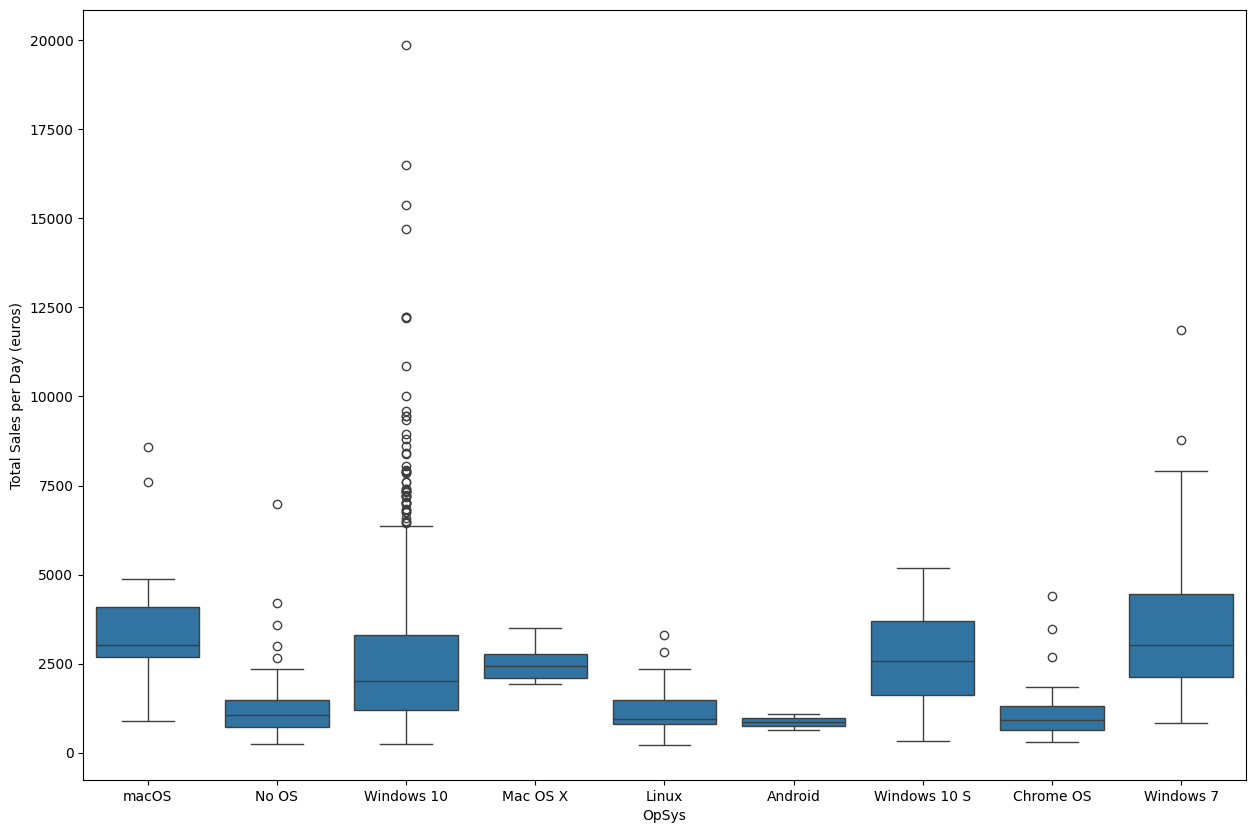

In [130]:
# visualize the difference in values of the different CPUs
# Visualisieren Sie die Wertunterschiede der verschiedenen CPUs
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="OpSys", y="Total Sales per Day (euros)")
plt.show()

In [131]:
# now do the same thing for RAMs
# Führe nun das Gleiche für RAMs durch

def cohens_d(a,b):
    r1, r2 = len(a), len(b)
    s1, s2 = a.std(), b.std()
    spooled = np.sqrt(((r1-1)*s1**2 + (r2-1)*s2**2) / (r1+r2-2))
    return (a.mean() - b.mean()) / spooled

print("cohen's d is equal:", cohens_d(RAM32, RAM16))
# having RAM 32 very large effect on the sales
# 32 GB RAM haben einen sehr großen Einfluss auf den Umsatz

print("Mean Ram 16:", RAM16.mean())
print( "Mean Ram 32:", RAM32.mean())
# RAM 32 have almost double better performance
# RAM 32 bietet eine fast doppelt so gute Leistung
print("var RAM16:", RAM16.var(), "var RAM32", RAM32.var())
# we see much higher variance for RAM 32, so this might make t est not reliable
# Bei RAM 32 beobachten wir eine deutlich höhere Varianz, daher könnte der Test unzuverlässig sein.
print("shapiro RAM32 :", shapiro(RAM32), "shapiro RAM16", shapiro(RAM16))
# RAM 16 distribution is not normal so t test is probably not the best
# Die RAM-16-Verteilung ist nicht normal, daher ist der t-Test wahrscheinlich nicht optimal.

cohen's d is equal: 1.5396346342057965
Mean Ram 16: 4305.032200000001
Mean Ram 32: 8129.703529411766
var RAM16: 5100369.615511717 var RAM32 19486459.44752426
shapiro RAM32 : ShapiroResult(statistic=np.float64(0.9266639261971439), pvalue=np.float64(0.19132606723731937)) shapiro RAM16 ShapiroResult(statistic=np.float64(0.948398996424593), pvalue=np.float64(1.3266109405489038e-06))


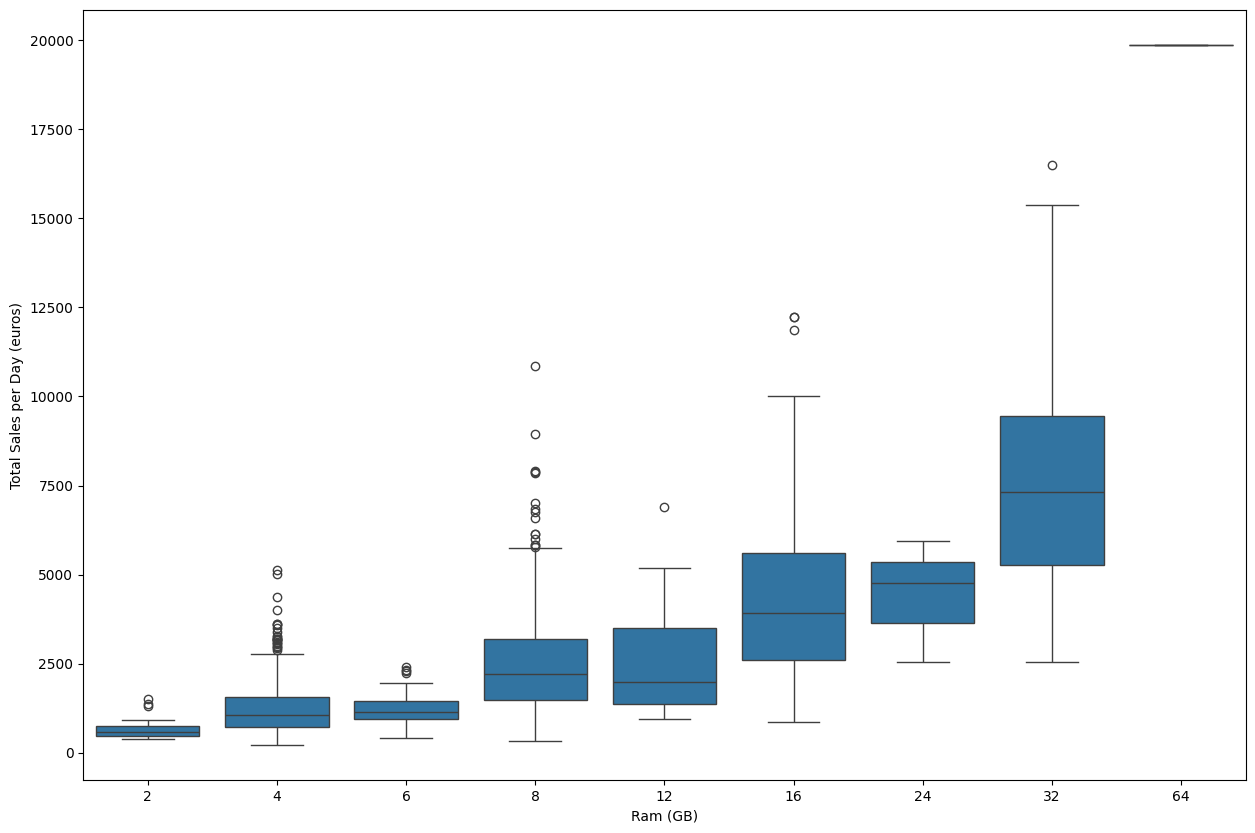

In [132]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="Ram (GB)", y="Total Sales per Day (euros)")
plt.show()

6) trying removing outliers, using whitney u test, and data transformation when variance and normality results can affect the validity of the p-value.

Versuchen Sie, Ausreißer zu entfernen, den Whitney-U-Test anzuwenden und die Daten zu transformieren, wenn die Ergebnisse der Varianz- und Normalitätsprüfung die Gültigkeit des p-Werts beeinflussen können.

Removing outliers for windows 10 and 7 and then performing a/b tests

Ausreißer für Windows 10 und 7 entfernen und anschließend A/B-Tests durchführen

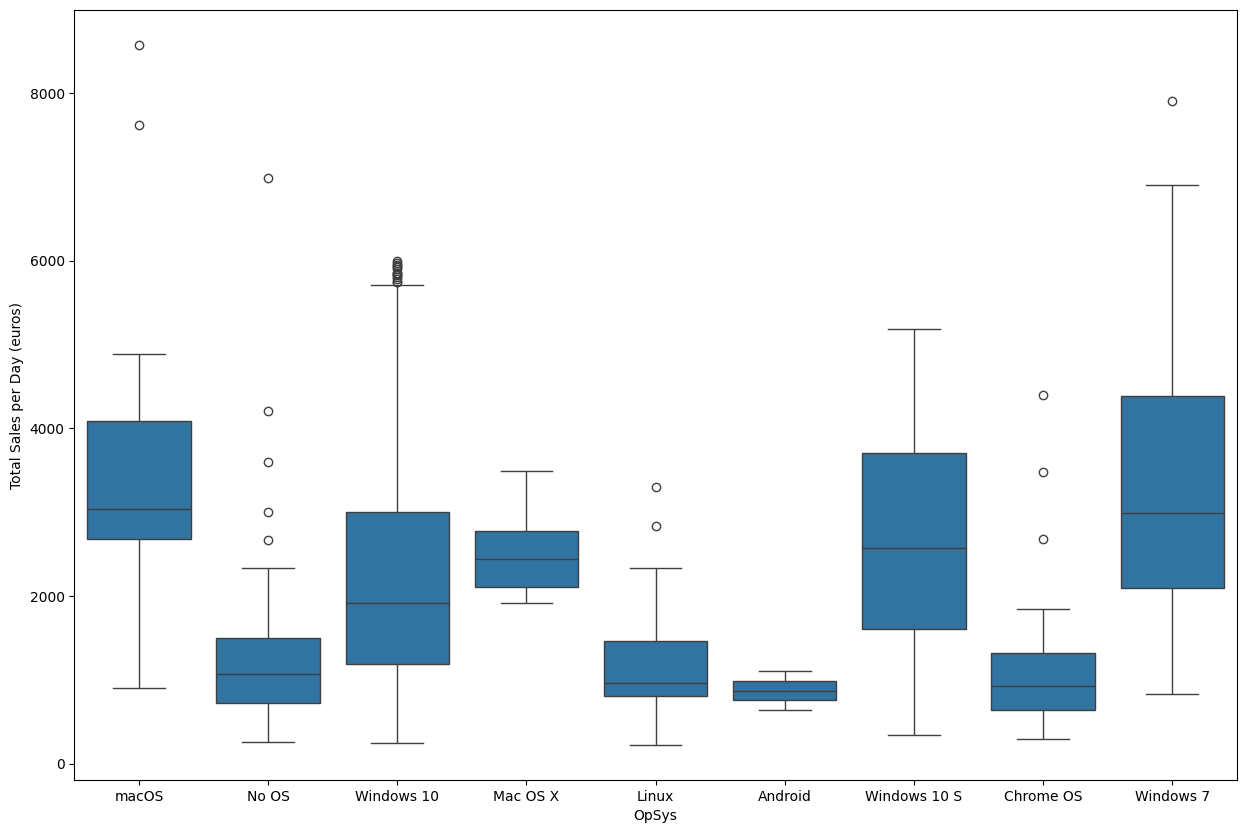

p-value: 0.00020110847854469484 t-stat: -4.052617659491564
Mean win10: 2227.0287622789783
Mean win7: 3257.689069767442
shapiro win10: ShapiroResult(statistic=np.float64(0.9286806467442228), pvalue=np.float64(1.3604490950776788e-21))
shapiro win7 ShapiroResult(statistic=np.float64(0.9523606867406126), pvalue=np.float64(0.07271907833951703))
var win10: 1783836.633443697 var win7: 2705826.1443134


In [139]:
filtereddf = df[~((df['OpSys'] == 'Windows 10') * (df["Total Sales per Day (euros)"] > 6100))]
filtereddf = filtereddf[~((filtereddf['OpSys'] == 'Windows 7') * (filtereddf["Total Sales per Day (euros)"] > 8000))]

plt.figure(figsize=(15,10))
sns.boxplot(data=filtereddf, x="OpSys", y="Total Sales per Day (euros)")
plt.show()

win102 = filtereddf[filtereddf["OpSys"] == 'Windows 10']["Total Sales per Day (euros)"]
win72 = filtereddf[filtereddf["OpSys"] == 'Windows 7']["Total Sales per Day (euros)"]
t_stat2, p_val2 = ttest_ind(win102, win72, equal_var=False)
print("p-value:", p_val2, "t-stat:", t_stat2)

print("Mean win10:", win102.mean())
print("Mean win7:", win72.mean())

from scipy.stats import shapiro
print("shapiro win10:", shapiro(win102))
print("shapiro win7", shapiro(win72))

print("var win10:", win102.var(), "var win7:", win72.var())

# variance is good, shapiro results are bit better
# Die Varianz ist gut, die Shapiro-Ergebnisse sind etwas besser.

Trying mann whitney u test and data transformation for RAMs and CPUs groups in case variance and normality are large

Anwendung des Mann-Whitney-U-Tests und Datentransformation für RAM- und CPU-Gruppen bei großen Varianzen und Normalverteilungen.

In [134]:
# CPUs
#  mann whitney u test
from scipy import stats
u_stat, p_value = stats.mannwhitneyu(win10, win7, alternative='two-sided')
print("p-value:", p_value, "u-stat:", u_stat)

# log transformation and ttest
logwin10 = np.log1p(win10)
logwin7 = np.log1p(win7)
t_statlog, p_valuelog = stats.ttest_ind(logwin10, logwin7, equal_var=True)
print("p-value:", p_valuelog, "u-stat:", t_statlog)

# p value lower than 0.05
# p-Wert kleiner als 0,05

p-value: 8.056556689755455e-05 u-stat: 15761.0
p-value: 0.00010518002267220146 u-stat: -3.8923146762141063


In [135]:
# RAMs
#  mann whitney u test
u_stat, p_value = stats.mannwhitneyu(RAM32, RAM16, alternative='two-sided')
print("p-value:", p_value, "u-stat:", u_stat)

# log transformation and ttest
logRAM32 = np.log1p(RAM32)
logRAM16 = np.log1p(RAM16)
t_statlog, p_valuelog = stats.ttest_ind(logRAM32, logRAM16, equal_var=True)
print("p-value:", p_valuelog, "u-stat:", t_statlog)

# p value lower than 0.05
# p-Wert kleiner als 0,05

p-value: 0.0001657555638912638 u-stat: 2636.5
p-value: 2.1407582293235514e-05 u-stat: 4.345732523547521


7) Using ANOVA to test sales between more than 2 Device types, and then use post hoc tukey test to check the exact groups.

Mithilfe der ANOVA die Verkaufszahlen von mehr als zwei Gerätetypen vergleichen und anschließend mit dem Post-hoc-Tukey-Test die genauen Gruppen überprüfen.

In [136]:
# now we try to a/b test of how type of device effect sales, first use ANOVA one way on the group
# in case p value is less than 0.05, i will perform post hoc tukey to see which exact types have differnet effect on the sales
# Nun führen wir einen A/B-Test durch, um zu untersuchen, wie sich der Gerätetyp auf den Umsatz auswirkt. Zuerst verwenden wir eine einfaktorielle ANOVA für die Gruppe.
# Falls der p-Wert kleiner als 0,05 ist, führe ich einen Post-hoc-Tukey-Test durch, um genau zu ermitteln, welche Gerätetypen einen unterschiedlichen Effekt auf den Umsatz haben.

from scipy.stats import f_oneway
groups = [g["Total Sales per Day (euros)"] for _, g in df.groupby("TypeName")]
f_stat, p_val = f_oneway(*groups)
print(f_stat, p_val)

74.93315601861316 4.5065803904661e-69


In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
post_hoc_tukey = pairwise_tukeyhsd(df["Total Sales per Day (euros)"], df["TypeName"])
print(post_hoc_tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1          group2    meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------------------
2 in 1 Convertible      Gaming   851.6414 0.0003   286.4153  1416.8674   True
2 in 1 Convertible     Netbook -1614.3473 0.0003 -2697.5176   -531.177   True
2 in 1 Convertible    Notebook -1178.1847    0.0  -1662.269  -694.1003   True
2 in 1 Convertible   Ultrabook   423.7051 0.2768  -146.3173   993.7275  False
2 in 1 Convertible Workstation  2023.0563    0.0  1003.6743  3042.4383   True
            Gaming     Netbook -2465.9887    0.0 -3510.4684  -1421.509   True
            Gaming    Notebook  -2029.826    0.0 -2419.7203 -1639.9318   True
            Gaming   Ultrabook  -427.9363 0.1309  -920.4862    64.6136  False
            Gaming Workstation  1171.4149 0.0085   193.2434  2149.5864   True
           Netbook    Notebook   436.1627 0.8165  -566.7306   14

# Results

knowing if the product is from Xiaomi or Huawei didn't make an effect on the customer decisions

small p value means that decide buying a device based on the type of the CPU if it is Intel or AMD, windows 10 or windows 7, and RAM 16 or RAM 32

workstation sells more than other types, the netbook and notebook, and gaming the least

# Ergebnisse

Die Produktmarke (Xiaomi oder Huawei) hatte keinen Einfluss auf die Kaufentscheidung.

Ein niedriger p-Wert bedeutet, dass die Kaufentscheidung für ein Gerät von Faktoren wie dem CPU-Typ (Intel oder AMD), Windows 10 oder Windows 7 und dem Arbeitsspeicher (16 GB oder 32 GB) abhängt.

Workstations verkaufen sich besser als Netbooks und Notebooks, Gaming-Geräte am schlechtesten.

# recommendations
the store can focus on the device, CPUs and RAMs more sold
gather more data for several more months to get more solid results.

In case normality of the data of some groups and the variance are large to cause some non validity to the t-test, we can use other mehtods and remove outliers and see if p-value is always smaller than 0.05

# Empfehlungen
Der Händler kann sich auf die meistverkauften Geräte, CPUs und RAMs konzentrieren.
Mehr Daten über mehrere Monate sammeln, um aussagekräftigere Ergebnisse zu erhalten.

Falls die Daten einiger Gruppen normalverteilt sind und die Varianz so groß ist, dass der t-Test ungültig wird, können wir andere Methoden anwenden, Ausreißer entfernen und prüfen, ob der p-Wert immer kleiner als 0,05 ist.